In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [32]:
data = pd.read_csv("dataset/water_potability.csv")
data

ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.180013        56.329076   4.500656           0  
2       418.606213       16.868637        66.420093   3.055934           0  
3       363.266516       18.436524       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
...            ...             ...              ...        ...         ...  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225              NaN   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1  

[3276 rows x 10 columns]

In [33]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [34]:
data.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [35]:
data.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [36]:
nan_counts_per_row = data.isnull().sum(axis=1)
nan_counts_per_row

0       1
1       1
2       1
3       0
4       0
       ..
3271    0
3272    2
3273    1
3274    1
3275    1
Length: 3276, dtype: int64

In [37]:
nan_counts_per_row.sum()

1434

In [38]:
# Define colors used as colorcodes
blue = '#51C4D3' # To mark drinkable water
green = '#74C365' # To mark undrinkable water
red = '#CD6155' # For further markings
orange = '#DC7633' # For further markings

<Figure size 640x480 with 0 Axes>

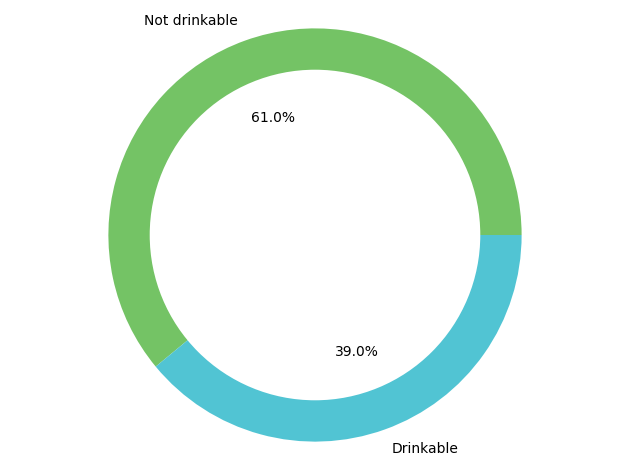

In [39]:
plt.clf()
plt.style.use('ggplot')

# Create subplot and pie chart
fig1, ax1 = plt.subplots()
ax1.pie(data['Potability'].value_counts(), colors=[green, blue], labels=['Not drinkable', 'Drinkable'], autopct='%1.1f%%', startangle=0, rotatelabels=False)

#draw circle
centre_circle = plt.Circle((0,0),0.80, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  

# Set tighten layout and show plot 
plt.tight_layout()
plt.show()

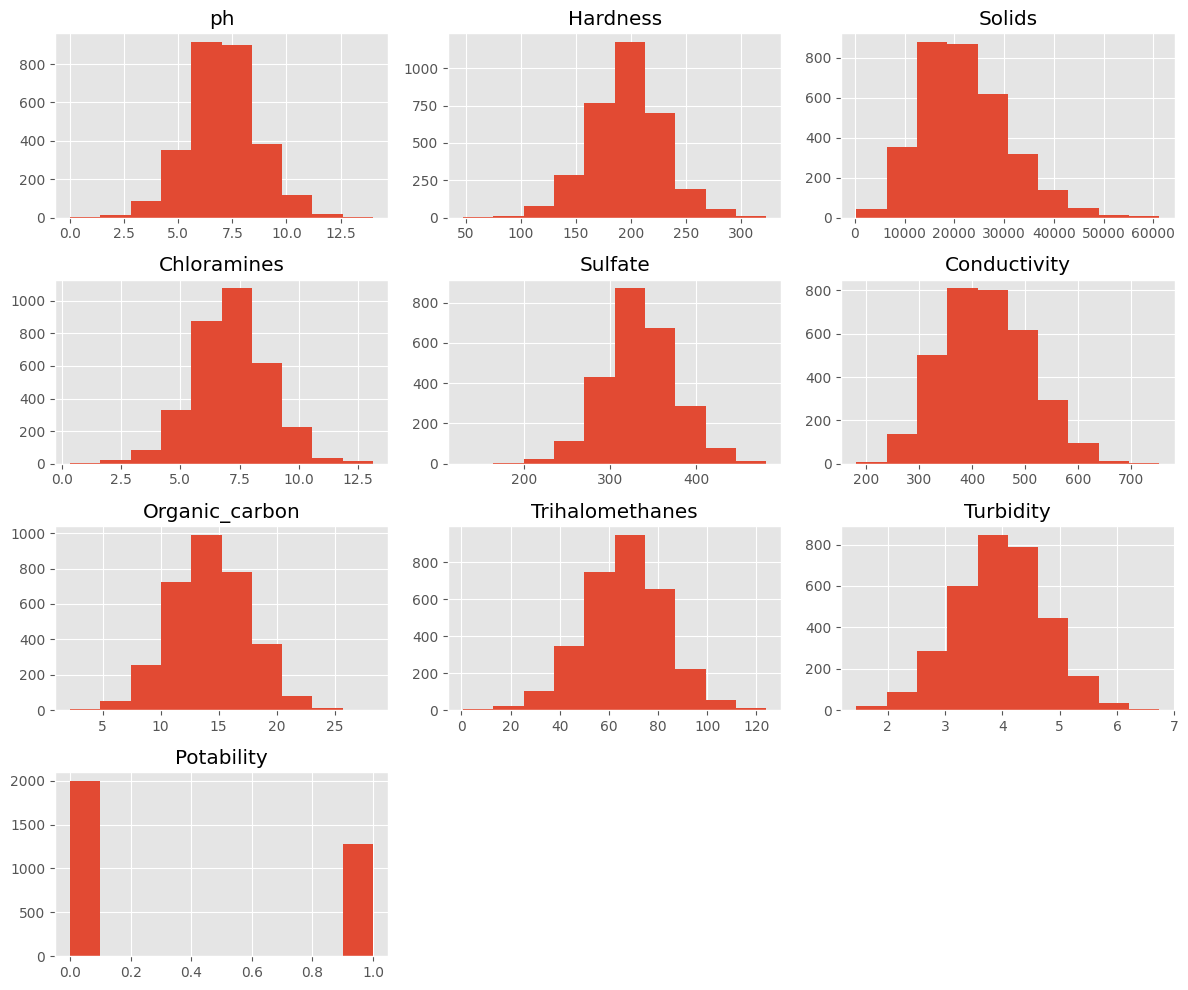

In [40]:
data.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

<Axes: title={'center': 'Missing Values Per Feature'}>

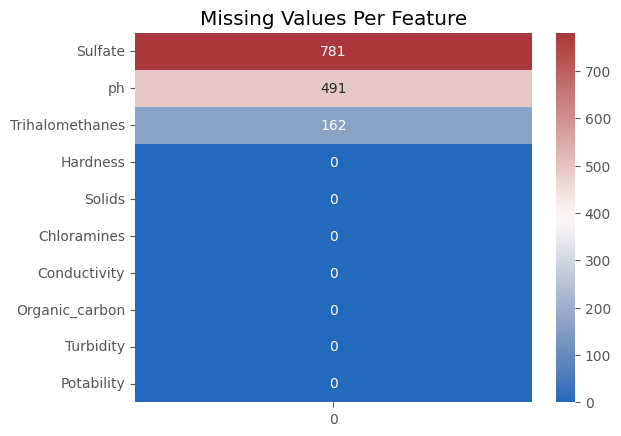

In [41]:
plt.title('Missing Values Per Feature')
nans = data.isna().sum().sort_values(ascending=False).to_frame()
sns.heatmap(nans,annot=True,fmt='d',cmap='vlag')

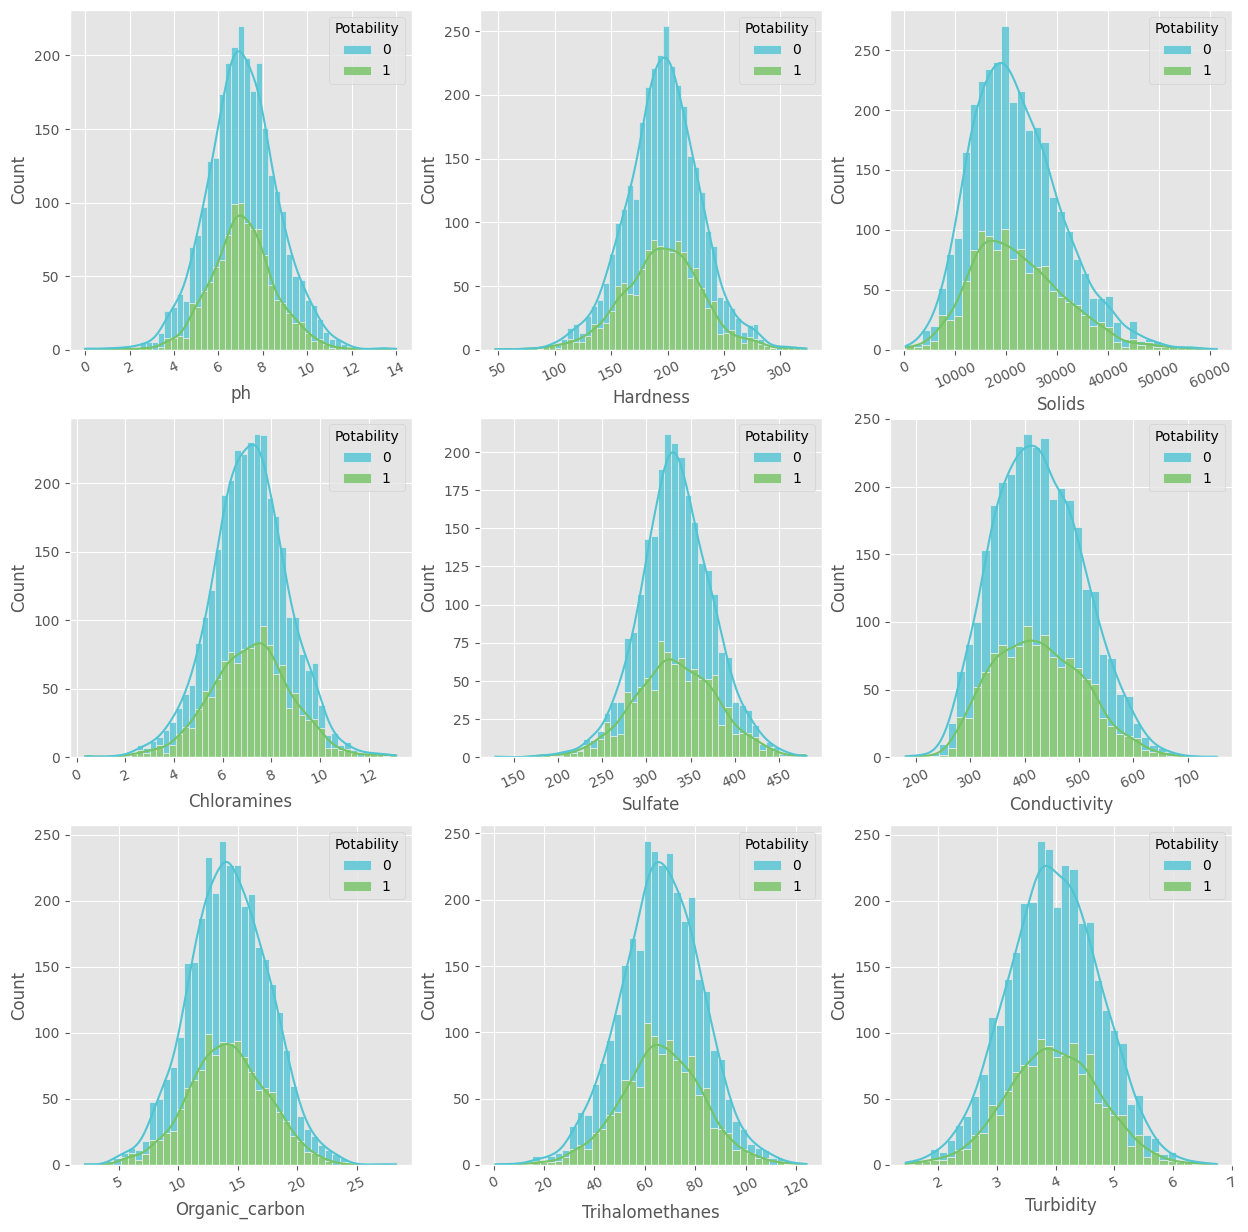

In [42]:
# Drop Potability column
plotter_dataset = data.drop('Potability', axis=1)

plt.figure(figsize = (15, 15))

feature = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']

# Iterate through the feature list and plot a histlpot
for i in enumerate(feature):
    plt.subplot(3, 3,i[0]+1)

    # Histlot plotting the fetures in the dataset
    sns.histplot(
        data = plotter_dataset, 
        x = plotter_dataset[i[1]], 
        hue = data['Potability'], 
        palette= [blue, green], 
        kde = True, 
        multiple='stack', 
        alpha=0.8
    )

    # Rotate the xticks for better readability
    plt.xticks(rotation = 25)

In [43]:
#################################### Imputing 'ph' value #####################################

phMean_0 = data[data['Potability'] == 0]['ph'].mean(skipna=True)
data.loc[(data['Potability'] == 0) & (data['ph'].isna()), 'ph'] = phMean_0
phMean_1 = data[data['Potability'] == 1]['ph'].mean(skipna=True)
data.loc[(data['Potability'] == 1) & (data['ph'].isna()), 'ph'] = phMean_1

##################################### Imputing 'Sulfate' value #####################################

SulfateMean_0 = data[data['Potability'] == 0]['Sulfate'].mean(skipna=True)
data.loc[(data['Potability'] == 0) & (data['Sulfate'].isna()), 'Sulfate'] = SulfateMean_0
SulfateMean_1 = data[data['Potability'] == 1]['Sulfate'].mean(skipna=True)
data.loc[(data['Potability'] == 1) & (data['Sulfate'].isna()), 'Sulfate'] = SulfateMean_1

################################ Imputing 'Trihalomethanes' value #####################################

TrihalomethanesMean_0 = data[data['Potability'] == 0]['Trihalomethanes'].mean(skipna=True)
data.loc[(data['Potability'] == 0) & (data['Trihalomethanes'].isna()), 'Trihalomethanes'] = TrihalomethanesMean_0
TrihalomethanesMean_1 = data[data['Potability'] == 1]['Trihalomethanes'].mean(skipna=True)
data.loc[(data['Potability'] == 1) & (data['Trihalomethanes'].isna()), 'Trihalomethanes'] = TrihalomethanesMean_1


In [44]:
print('Checking to see any more missing data \n')
data.isna().sum()

Checking to see any more missing data 



ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [45]:
data

ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.085378  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246  334.564290   
2     8.099124  224.236259  19909.541732     9.275884  334.564290   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362  332.566990   
3273  9.419510  175.762646  33155.578218     7.350233  332.566990   
3274  5.126763  230.603758  11983.869376     6.303357  332.566990   
3275  7.874671  195.102299  17404.177061     7.509306  332.566990   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.180013        56.329076   4.500656           0  
2       418.606213       16.868637        66.420093   3.055934           0  
3       363.266516       18.436524       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
...            ...             ...              ...        ...         ...  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225        66.539684   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1  

[3276 rows x 10 columns]

In [46]:
data.corr()

ph  Hardness    Solids  Chloramines   Sulfate  \
ph               1.000000  0.075878 -0.081887    -0.031827  0.014785   
Hardness         0.075878  1.000000 -0.046899    -0.030054 -0.092718   
Solids          -0.081887 -0.046899  1.000000    -0.070148 -0.149809   
Chloramines     -0.031827 -0.030054 -0.070148     1.000000  0.023490   
Sulfate          0.014785 -0.092718 -0.149809     0.023490  1.000000   
Conductivity     0.017205 -0.023915  0.013831    -0.020486 -0.014196   
Organic_carbon   0.040092  0.003610  0.010242    -0.012653  0.027403   
Trihalomethanes  0.003009 -0.012718 -0.008849     0.016615 -0.025797   
Turbidity       -0.036211 -0.014449  0.019546     0.002363 -0.009523   
Potability      -0.003848 -0.013837  0.033743     0.023779 -0.026957   

                 Conductivity  Organic_carbon  Trihalomethanes  Turbidity  \
ph                   0.017205        0.040092         0.003009  -0.036211   
Hardness            -0.023915        0.003610        -0.012718  -0.014449   
Solids               0.013831        0.010242        -0.008849   0.019546   
Chloramines         -0.020486       -0.012653         0.016615   0.002363   
Sulfate             -0.014196        0.027403        -0.025797  -0.009523   
Conductivity         1.000000        0.020966         0.001238   0.005798   
Organic_carbon       0.020966        1.000000        -0.012944  -0.027308   
Trihalomethanes      0.001238       -0.012944         1.000000  -0.021540   
Turbidity            0.005798       -0.027308        -0.021540   1.000000   
Potability          -0.008128       -0.030001         0.007305   0.001581   

                 Potability  
ph                -0.003848  
Hardness          -0.013837  
Solids             0.033743  
Chloramines        0.023779  
Sulfate           -0.026957  
Conductivity      -0.008128  
Organic_carbon    -0.030001  
Trihalomethanes    0.007305  
Turbidity          0.001581  
Potability         1.000000

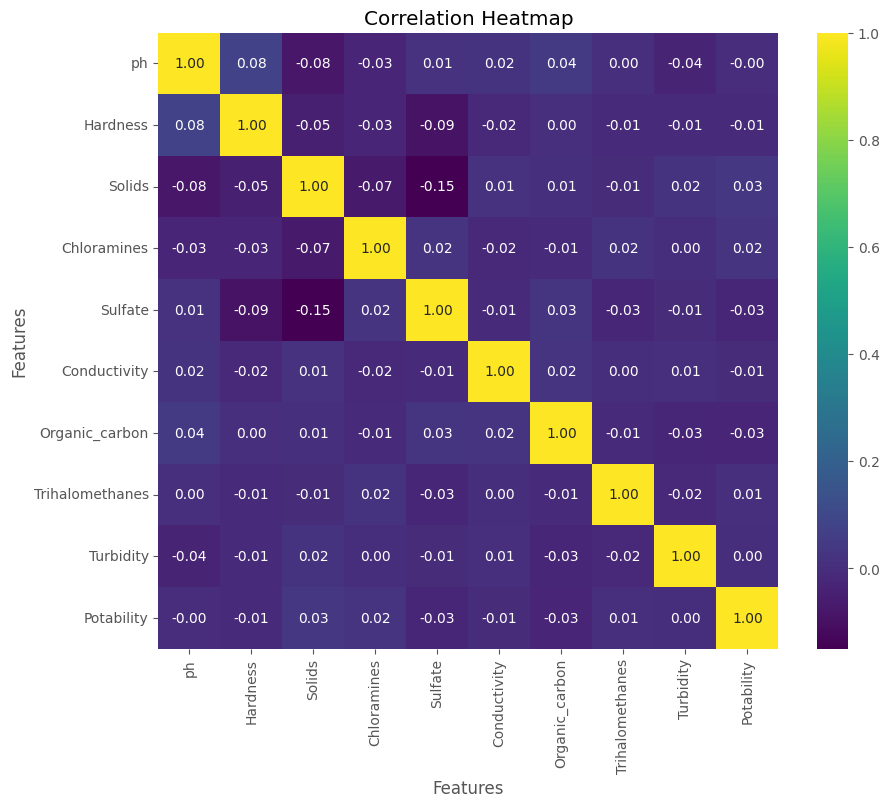

In [47]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='viridis', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

In [48]:
inf_values = np.isinf(data)

# Check if any infinity values exist in the DataFrame
if inf_values.any().any():
    print("Infinity values exist in the DataFrame.")
else:
    print("No infinity values found in the DataFrame.")

No infinity values found in the DataFrame.


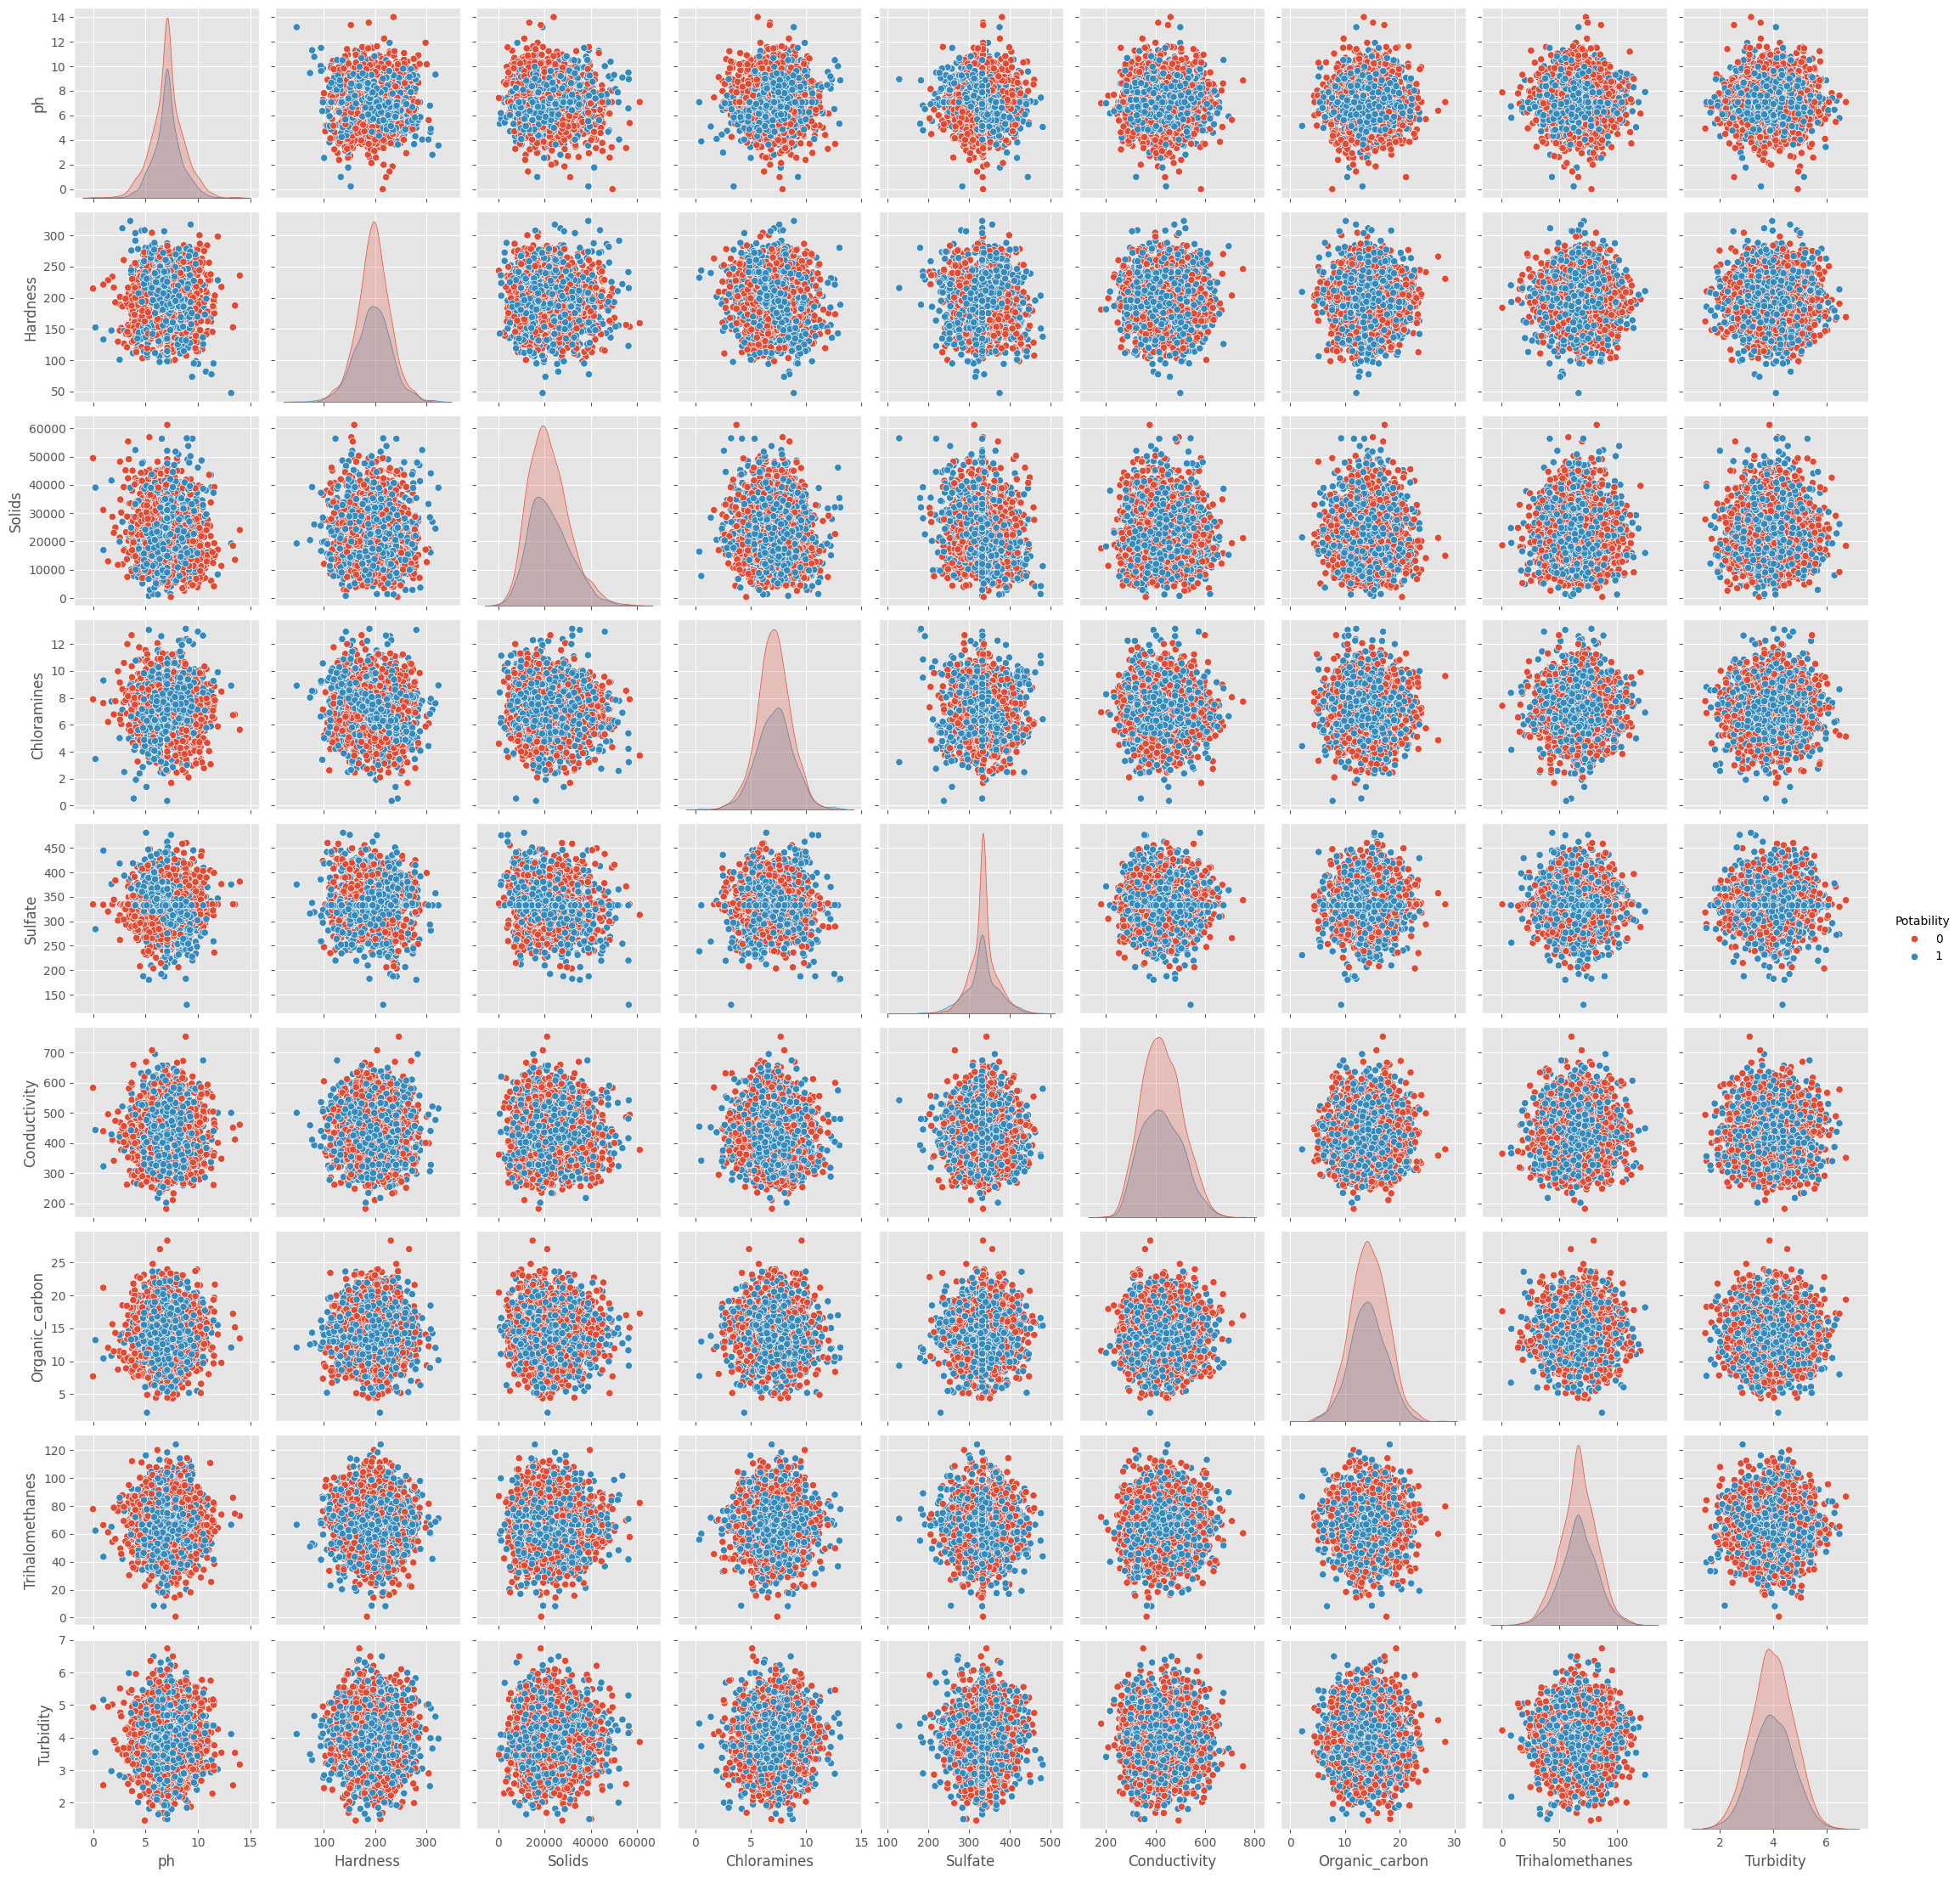

In [49]:
sns.pairplot(data[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability']], hue='Potability')
plt.show()

In [50]:
X = data.drop(columns=['Potability'])
y = data['Potability']

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=42)

X_train, y_train



(array([[6.62361357e+00, 2.03030141e+02, 1.71673013e+04, ...,
         1.59145001e+01, 6.50212290e+01, 2.91516595e+00],
        [6.68469974e+00, 1.93840931e+02, 3.41571845e+04, ...,
         8.81875657e+00, 6.66593522e+01, 4.03065983e+00],
        [6.83605995e+00, 2.05667718e+02, 1.83213275e+04, ...,
         1.38089233e+01, 7.07142255e+01, 4.95250825e+00],
        ...,
        [6.63036382e+00, 1.86761088e+02, 3.09390232e+04, ...,
         1.38157569e+01, 8.67531175e+01, 3.49058757e+00],
        [8.78316762e+00, 2.18032840e+02, 1.61835866e+04, ...,
         1.63545202e+01, 4.71009821e+01, 4.27413688e+00],
        [6.69815387e+00, 1.98286268e+02, 3.46758628e+04, ...,
         1.21766783e+01, 6.65396837e+01, 3.75817965e+00]]),
 array([0, 0, 0, ..., 0, 0, 1], dtype=int64))

In [51]:
X_test, y_test

(array([[7.08537844e+00, 1.83521107e+02, 2.04612527e+04, ...,
         2.01790289e+01, 6.70199032e+01, 4.88663379e+00],
        [6.64315871e+00, 1.88913541e+02, 3.28738200e+04, ...,
         1.47068103e+01, 6.78448489e+01, 4.56219767e+00],
        [7.84605793e+00, 2.24058877e+02, 2.32641100e+04, ...,
         1.34067375e+01, 4.30751865e+01, 2.48796865e+00],
        ...,
        [7.45914486e+00, 2.17700130e+02, 1.94365035e+04, ...,
         1.44602946e+01, 5.71961885e+01, 3.84105204e+00],
        [5.86264123e+00, 1.85065220e+02, 4.40692722e+04, ...,
         1.53060789e+01, 5.96058121e+01, 5.50742094e+00],
        [7.08537844e+00, 2.20552524e+02, 2.81350768e+04, ...,
         1.75322978e+01, 8.68480979e+01, 3.56957027e+00]]),
 array([0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
        0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
        1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,

In [52]:
# Assuming 'data' is your dataset
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same transformation to the testing data
X_test_scaled = scaler.transform(X_test)
X_train_scaled

array([[-0.31738623,  0.20204646, -0.55463361, ...,  0.50622105,
        -0.08426986, -1.3411035 ],
       [-0.27561478, -0.08006604,  1.36873646, ..., -1.65420736,
         0.01911964,  0.09082874],
       [-0.17211285,  0.28302115, -0.42399002, ..., -0.13486017,
         0.27504135,  1.27418303],
       ...,
       [-0.31277033, -0.29742012,  1.00441877, ..., -0.13277954,
         1.28732961, -0.60244883],
       [ 1.15934269,  0.66263542, -0.66599679, ...,  0.6401932 ,
        -1.21529909,  0.40337428],
       [-0.26641468,  0.05640763,  1.42745437, ..., -0.63182689,
         0.01156681, -0.25894741]])

In [53]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

predictions = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, predictions)
print("Logistic Regression Accuracy:", accuracy)

Logistic Regression Accuracy: 0.6280487804878049


In [54]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train_scaled, y_train)

predictions = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, predictions)
print("Random Forest Accuracy:", accuracy)


Random Forest Accuracy: 0.8140243902439024


In [55]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Since SVMs are sensitive to feature scaling, we use a pipeline with StandardScaler
model = make_pipeline(StandardScaler(), SVC())
model.fit(X_train, y_train)

predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("SVM Accuracy:", accuracy)


SVM Accuracy: 0.6996951219512195


In [56]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate on test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print("Neural Network Accuracy:", test_accuracy)


Epoch 1/10


c:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5759 - loss: 0.6880 - val_accuracy: 0.6126 - val_loss: 0.6665
Epoch 2/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6263 - loss: 0.6422 - val_accuracy: 0.6527 - val_loss: 0.6513
Epoch 3/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6604 - loss: 0.6272 - val_accuracy: 0.6584 - val_loss: 0.6337
Epoch 4/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6893 - loss: 0.6028 - val_accuracy: 0.6718 - val_loss: 0.6198
Epoch 5/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6948 - loss: 0.5932 - val_accuracy: 0.6813 - val_loss: 0.6101
Epoch 6/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6855 - loss: 0.5891 - val_accuracy: 0.6718 - val_loss: 0.6094
Epoch 7/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6804 - loss: 0.5817 - val_accuracy: 0.6775 - val_loss: 0.6037
Epoch 8/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7123 - loss: 0.5641 - val_accuracy: 0.6698 - val_loss: 0.6021
Epo

In [57]:
from sklearn.impute import SimpleImputer
from sklearn.utils import resample

In [58]:
data = pd.read_csv("dataset/water_potability.csv")
data

ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.180013        56.329076   4.500656           0  
2       418.606213       16.868637        66.420093   3.055934           0  
3       363.266516       18.436524       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
...            ...             ...              ...        ...         ...  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225              NaN   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1  

[3276 rows x 10 columns]

In [59]:
desired_size = 50000
repeats = desired_size // len(data) + 1
data = pd.concat([data] * repeats, ignore_index=True)
data = data[:desired_size]

# Random noise addition to numerical features
numerical_features = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']
data[numerical_features] += np.random.normal(0, 0.1, size=(len(data), len(numerical_features)))

# Feature scaling
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Impute missing values
imputer = SimpleImputer(strategy='mean')
data[numerical_features] = imputer.fit_transform(data[numerical_features])

# Class balancing (assuming binary classification)
class_0 = data[data['Potability'] == 0]
class_1 = data[data['Potability'] == 1]
class_1_upsampled = resample(class_1, replace=True, n_samples=len(class_0), random_state=42)
data_balanced = pd.concat([class_0, class_1_upsampled])

print("Size of the generated dataset:", len(data_balanced))

Size of the generated dataset: 61020


In [60]:
data_balanced

ph  Hardness    Solids  Chloramines       Sulfate  \
0     -2.755054e-17  0.259015 -0.139429     0.156449  8.401199e-01   
1     -2.022522e+00 -2.038839 -0.385944    -0.334704  2.683758e-16   
2      7.229125e-01  0.848613 -0.240026     1.385682  2.683758e-16   
3      7.460040e-01  0.540864  0.000529     0.508925  5.639362e-01   
4      1.322869e+00 -0.462182 -0.460189    -0.355237 -5.712317e-01   
...             ...       ...       ...          ...           ...   
23697  5.082168e-01  0.325453 -0.268723     0.887049 -5.217870e-01   
46153  2.682265e-01 -1.201173  0.482529     0.790664 -1.899714e+00   
33569 -8.166806e-01 -0.161142  0.439126    -1.437602 -4.330671e-01   
40042  6.193946e-01  0.454539  0.110565    -0.241167 -1.773430e-01   
11430 -2.755054e-17 -0.999456  1.237769    -0.617742 -3.926518e-01   

       Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0          1.708880       -1.228777         1.271474  -1.285233           0  
1          2.061842        0.290887        -0.619595   0.640688           0  
2         -0.093399        0.769356         0.020086  -1.391989           0  
3         -0.777295        1.260883         2.102154   0.822016           0  
4         -0.346190       -0.805378        -2.125752   0.123665           0  
...             ...             ...              ...        ...         ...  
23697     -0.831476        2.148170        -0.165856  -0.450182           1  
46153      0.861816       -0.190534        -0.060014   0.360011           1  
33569     -0.693113        1.207617        -1.091951  -1.198379           1  
40042     -0.722190       -0.096250        -0.658340   1.279905           1  
11430     -1.814819       -1.081444         0.935098  -0.421291           1  

[61020 rows x 10 columns]

In [61]:
X_balanced = data_balanced.drop(columns=['Potability'])
y_balanced = data_balanced['Potability']

X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(X_balanced.values, y_balanced.values, test_size=0.2, random_state=42)

In [62]:
model = LogisticRegression()
model.fit(X_train_balanced, y_train_balanced)

predictions = model.predict(X_test_balanced)
accuracy = accuracy_score(y_test_balanced, predictions)
print("Logistic Regression Accuracy:", accuracy)

Logistic Regression Accuracy: 0.5217141920681744


In [63]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train_balanced, y_train_balanced)

predictions = model.predict(X_test_balanced)
accuracy = accuracy_score(y_test_balanced, predictions)
print("Random Forest Accuracy:", accuracy)

Random Forest Accuracy: 1.0


In [64]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Since SVMs are sensitive to feature scaling, we use a pipeline with StandardScaler
model = make_pipeline(StandardScaler(), SVC())
model.fit(X_train_balanced, y_train_balanced)

predictions = model.predict(X_test_balanced)
accuracy = accuracy_score(y_test_balanced, predictions)
print("SVM Accuracy:", accuracy)


SVM Accuracy: 0.8227630285152409


In [65]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_balanced.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_balanced, y_train_balanced, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate on test set
test_loss, test_accuracy = model.evaluate(X_test_balanced, y_test_balanced)
print("Neural Network Accuracy:", test_accuracy)


Epoch 1/10


c:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1221/1221 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6144 - loss: 0.6355 - val_accuracy: 0.6921 - val_loss: 0.5773
Epoch 2/10
1221/1221 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6985 - loss: 0.5674 - val_accuracy: 0.7144 - val_loss: 0.5487
Epoch 3/10
1221/1221 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7357 - loss: 0.5180 - val_accuracy: 0.7510 - val_loss: 0.4984
Epoch 4/10
1221/1221 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7723 - loss: 0.4764 - val_accuracy: 0.7786 - val_loss: 0.4641
Epoch 5/10
1221/1221 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7926 - loss: 0.4395 - val_accuracy: 0.7919 - val_loss: 0.4307
Epoch 6/10
1221/1221 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8178 - loss: 0.4003 - val_accuracy: 0.8177 - val_loss: 0.3922
Epoch 7/10
1221/1221 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8425 - loss: 0.3658 - val_accuracy: 0.8447 - val_loss: 0.3609
Epoch 8/10
1221/1221 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8582 - loss: 0.3384 - val_accurac